In [1]:
import numpy as np
# keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# Fashion-MNISTデータセットをインポート
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 訓練データ
# 60000x28x28の3次元配列を60000×784の2次元配列に変換
x_train = x_train.reshape(60000, 784)
# 訓練データをfloat32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train = x_train / 255

# 正解ラベルの数
correct = 10
# 正解ラベルをワンホット符号化法で変換
y_train = np_utils.to_categorical(y_train, correct)

# テストデータ
# 10000x28x28の3次元配列を10000×784の2次元配列に変換
x_test = x_test.reshape(10000, 784)
# テストデータをfloat32(浮動小数点数)型に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test = x_test / 255
# 正解ラベルをンホット符号化法で変換
y_test = np_utils.to_categorical(y_test, correct)

In [3]:
# ニューラルネットワークの構築
# keras.modelsからSequentialをインポート
from keras.models import Sequential
# keras.layersからDense、Activationをインポート
from keras.layers import Dense, Activation
# keras.optimizersからAdamをインポート
from keras.optimizers import SGD

# 隠れ層
model = Sequential()                 # Sequentialオブジェクトの生成
model.add(Dense(200,                 # 隠れ層のニューロン数は200
                input_dim=784,       # 入力層のニューロン数は784
                activation='relu'    # 活性化関数はReLU
               ))
# 出力層
model.add(Dense(10,                  # 出力層のニューロン数は10
                activation='softmax' # 活性化関数は'softmax' 
               ))

# モデルのコンパイル
learning_rate = 0.5                  # 学習率
model.compile(                       # オブジェクトのコンパイル
    loss='categorical_crossentropy', # 損失の基準は交差エントロピー誤差
    optimizer=SGD(lr=learning_rate), # 学習方法をSGDにする
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

In [4]:
model.summary() # ニューラルネットワークのサマリー（概要）を出力

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 学習回数、ミニバッチのサイズを設定
training_epochs = 10 # 学習回数
batch_size = 50      # ミニバッチのサイズ

In [6]:
# 学習を行って結果を出力
import time

startTime = time.time()
history = model.fit(x_train,           # 訓練データ
                    y_train,           # 正解ラベル
                    epochs=training_epochs,          # 学習を繰り返す回数
                    batch_size=batch_size,    # 勾配計算に用いるサンプル数
                    verbose=1,         # 学習の進捗状況を出力する
                    validation_data=(
                        x_test, y_test # テストデータの指定
                    ))
# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)
# テストデータの誤り率を出力
print('Test loss:', score[0])
# テストデータの正解率を出力
print('Test accuracy:', score[1])
# 処理にかかった時間を出力
print("Time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.7360 - acc: 0.7285 - val_loss: 0.5141 - val_acc: 0.8165
Epoch 2/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.4776 - acc: 0.8236 - val_loss: 0.4872 - val_acc: 0.8220
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.4241 - acc: 0.8439 - val_loss: 0.5175 - val_acc: 0.8116
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3914 - acc: 0.8561 - val_loss: 0.4627 - val_acc: 0.8442
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3713 - acc: 0.8635 - val_loss: 0.4173 - val_acc: 0.8526
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3559 - acc: 0.8692 - val_loss: 0.4130 - val_acc: 0.8589
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3430 - acc: 0.8760 - val_loss: 0.3796 - val_acc

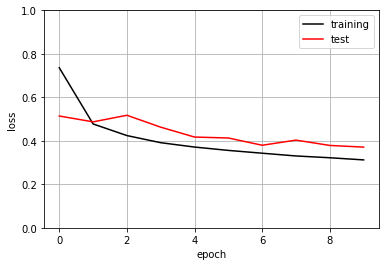

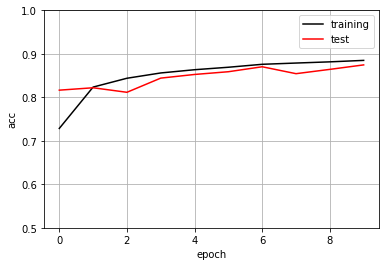

In [7]:
# 損失（誤り率）、正解率をグラフにする
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

# 訓練データの正解率をプロット
plt.plot(history.history['acc'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_acc'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()